# 可视化中间激活

In [2]:
from keras.models import load_model

In [3]:
model = load_model('cats_and_dogs_small_2.h5')

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [14]:
img_path = 'dogs_vs_cats/test/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor.shape

(150, 150, 3)

In [15]:
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
img_tensor.shape

(1, 150, 150, 3)

In [16]:
img_tensor[0].shape

(150, 150, 3)

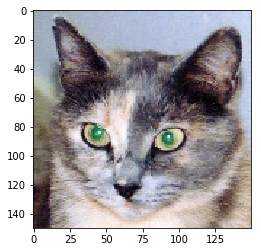

In [17]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [18]:
from keras import models

In [19]:
model.layers

In [20]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [21]:
activations = activation_model.predict(img_tensor)

In [83]:
activations

[array([[[[0.02390927, 0.08045417, 0.        , ..., 0.02181049,
           0.        , 0.07738864],
          [0.02351322, 0.08493495, 0.        , ..., 0.02531786,
           0.        , 0.08589086],
          [0.02241452, 0.08624846, 0.        , ..., 0.02727969,
           0.        , 0.08509776],
          ...,
          [0.04075376, 0.10983998, 0.        , ..., 0.03106507,
           0.        , 0.11741578],
          [0.03674462, 0.11456814, 0.        , ..., 0.03373944,
           0.        , 0.12294232],
          [0.03830795, 0.11352242, 0.        , ..., 0.03528093,
           0.        , 0.11852749]],
 
         [[0.02395946, 0.07800858, 0.        , ..., 0.0204296 ,
           0.        , 0.07807661],
          [0.02265828, 0.08238823, 0.        , ..., 0.02484967,
           0.        , 0.08650625],
          [0.02913255, 0.08206714, 0.        , ..., 0.03199619,
           0.        , 0.0830048 ],
          ...,
          [0.04197493, 0.11024588, 0.        , ..., 0.03752207,
   

In [23]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


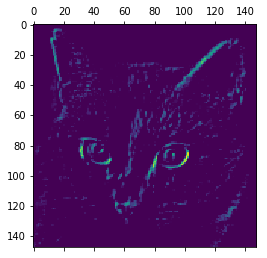

In [78]:
plt.matshow(first_layer_activation[0, :, :, 16], cmap='viridis')

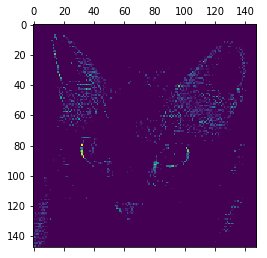

In [40]:
plt.matshow(first_layer_activation[0, :, :, 12], cmap='viridis')

In [79]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
layer_names

['conv2d_1',
 'max_pooling2d_1',
 'conv2d_2',
 'max_pooling2d_2',
 'conv2d_3',
 'max_pooling2d_3',
 'conv2d_4',
 'max_pooling2d_4']

In [85]:
print(len(activations))
print(len(layer_names))

8
8


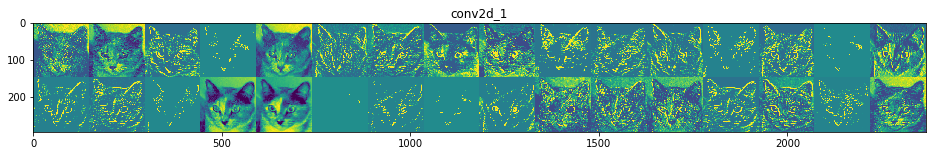

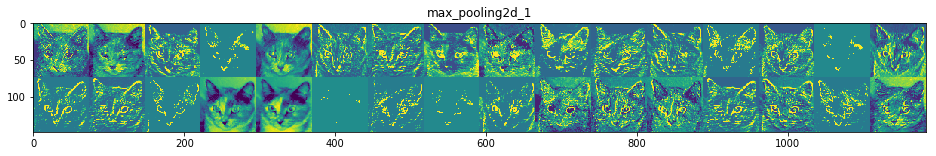

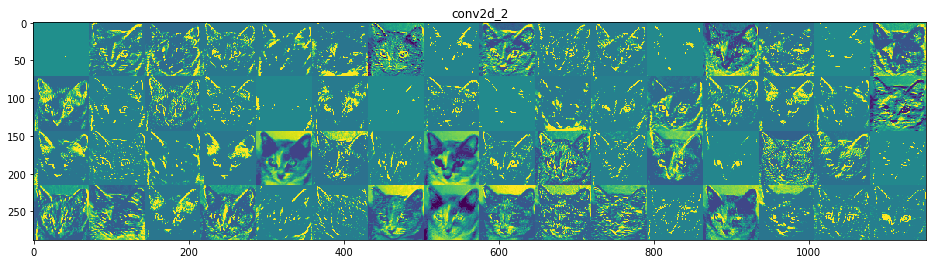

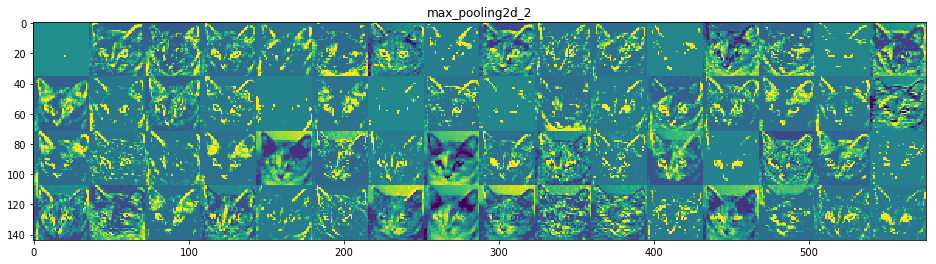

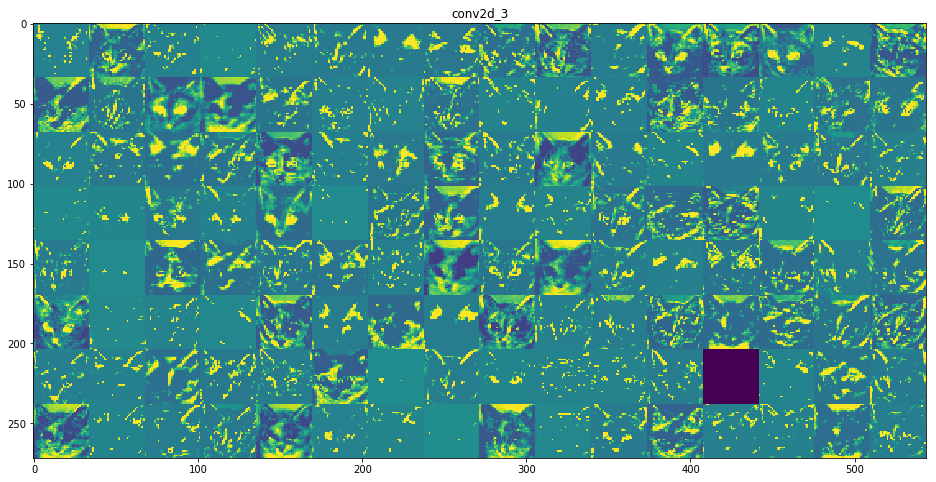

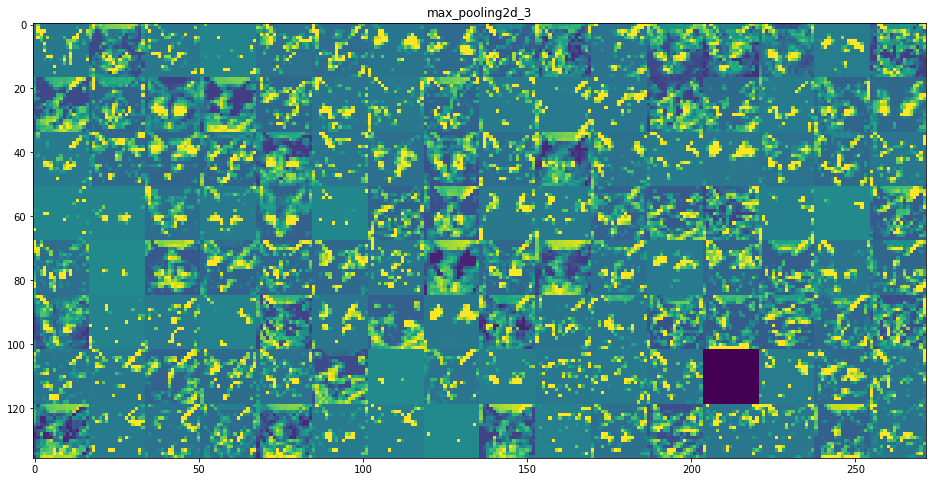

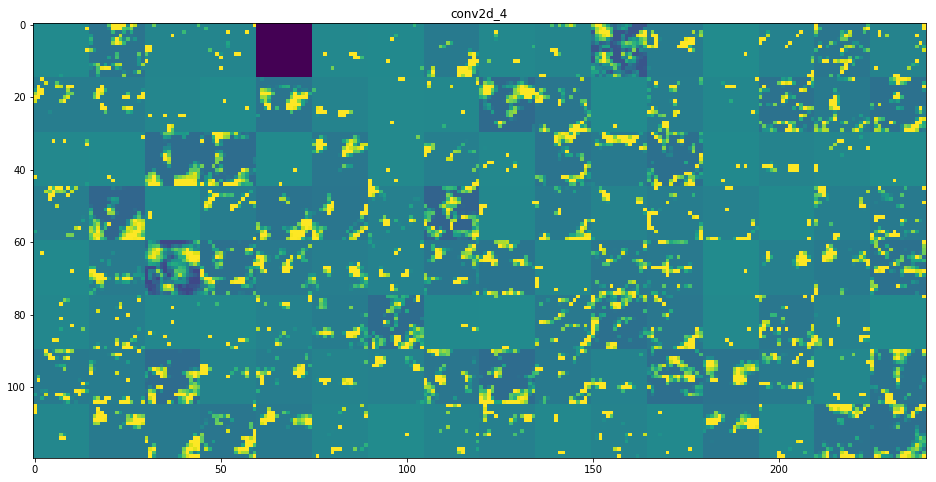

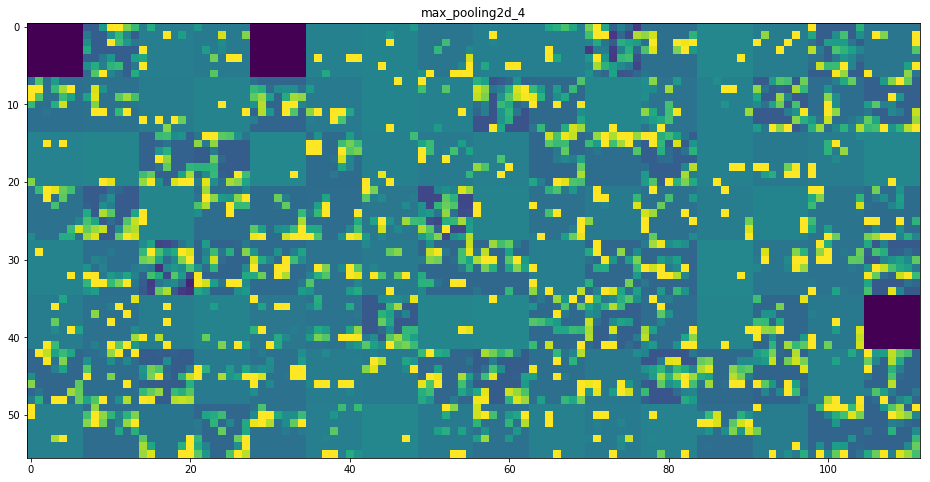

In [87]:
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:,col*images_per_row+row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            # numpy.clip(a, a_min, a_max, out=None) 
            # 将数组中的元素限制在a_min, a_max之间，大于a_max的就使得它等于 a_max，
            # 小于a_min的就使得它等于a_min
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col*size : (col+1)*size,
                         row*size : (row+1)*size] = channel_image
    scale = 1./size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')